# Breast Cancer

## Introduction

Unveiling the Hidden Landscape of Breast Cancer: A Data Exploration Journey
Breast cancer, a complex and multifaceted disease, continues to affect countless lives worldwide. While advancements in diagnosis and treatment have brought hope, much remains to be unraveled. This notebook embarks on a data-driven exploration, delving into the secrets hidden within a breast cancer dataset, aiming to:

**Understand the Landscape:**

Unveiling Patterns: Explore the distribution of patient demographics like age, menopause status, and their potential connections to cancer diagnosis.
Dissecting Tumor Characteristics: Analyze tumor size, type, and other features, identifying patterns and relationships that might shed light on cancer behavior.
Beyond Individual Features: Discover if combined factors, like age and tumor size, hold greater predictive power than individual variables.
Seeking Unexpected Insights:

**Hidden Connections:**

Utilize data visualization to uncover hidden relationships between seemingly unrelated variables, potentially revealing new avenues for understanding risk factors or disease progression.
Predictive Power: Can we leverage the data to predict the likelihood of recurrence or response to treatment with improved accuracy?
Exploring Untapped Potential: Are there opportunities to apply innovative data analysis techniques to unlock further insights and support advancements in breast cancer research?

**Ultimately, this exploration strives to:**

Gain a deeper understanding of the complex interactions within breast cancer data.
Identify potential areas for further investigation and research opportunities.
Contribute to the ongoing fight against breast cancer by harnessing the power of data analysis.

**The questions that will be answered:**


- Patient Demographics:
    - Age and Risk:
        - Does the risk of different cancer types vary significantly across age groups?
        - Is there a specific age range where the risk starts to increase?
    - Menopause and Status: 
        -How does menopause status (premenopausal, postmenopausal) influence the likelihood of developing specific cancer types?
        - Are there differences in tumor characteristics based on menopausal status?
    - Lifestyle Factors:
        - Are there any potential lifestyle factors (e.g., exercise, diet) reflected in the data that might be worth exploring in relation to cancer risk?


- Tumor Characteristics:
    - Size and Severity
        - Is there a clear correlation between tumor size and cancer severity (e.g., stage, recurrence)? Do certain size ranges indicate higher risk?
    - Type and Distribution:
        - How do the distribution and types of tumor cells (e.g., invasive, non-invasive) differ between benign and malignant tumors?
        - Are there specific types associated with higher aggressiveness?
    - Predictive Features:
        - Can specific tumor features (e.g., growth rate, receptor status) help predict the risk of recurrence or response to treatment with higher accuracy?

- Relationships and Insights:
    - Combined Impact:
        - Do combined factors like age and tumor size hold more predictive power than individual features?
        - Can we identify specific combinations that are particularly high-risk?
    - Unexpected Connections:
        - Are there any surprising relationships between seemingly unrelated variables (e.g., tumor location and patient demographics)?
        - Can these connections offer new insights into cancer development or progression?
    - Hidden Patterns:
        - Can data visualization techniques reveal hidden patterns or clusters that suggest specific cancer subtypes or risk factors?
        - Can we identify groups of patients with similar characteristics and outcomes?

- Predicting Risk and Outcomes:
    - Can a model be built to predict the probability of a patient developing breast cancer based on age, demographics, and lifestyle factors (if available in the data)?
    - Is it possible to develop a model that stratifies patients into risk groups (low, medium, high) by combining patient characteristics and tumor features? This could aid in prioritizing further screening or treatment decisions.
    - Building on survival data (if available), can a model be created to predict the likelihood of a patient surviving for a specific timeframe after diagnosis, considering factors like tumor stage, receptor status, and administered treatment?
    - Given a patient's tumor characteristics and other relevant data, can a model be built to predict their potential response to various treatment options (chemotherapy, radiation therapy)?
- Identifying Patterns and Relationships:
    - Can machine learning models uncover hidden subgroups within the data that suggest distinct cancer subtypes or patient risk factors?
    - Is it possible to develop a model that identifies combinations of features (age, tumor size, etc.) that hold a stronger predictive power for cancer risk compared to individual features alone?
    - By analyzing the data, can models reveal unexpected relationships between seemingly unrelated variables (e.g., tumor location and patient demographics) that might offer new insights into cancer development or progression?

**Breast Cancer Dataset:**

This exploration will utilize a dataset containing 286 instances (data points) and 10 features, providing valuable insights into various aspects of breast cancer. By carefully analyzing and interpreting this data, we aim to unlock its hidden potential and contribute to the ongoing fight against this global challenge.

| Variable Name | Role | Type | Description | Units | Missing Values |
|---|---|---|---|---|---|
| Class | Target | Binary | Recurrence status | no-recurrence-events, recurrence-events | no |
| age | Feature | Categorical | Age | years | no |
| menopause | Feature | Categorical | Menopausal status | lt40, ge40, premeno | no |
| tumor-size | Feature | Categorical | Tumor size range | 0-4, 5-9, ..., 55-59 | no |
| inv-nodes | Feature | Categorical | Number of involved lymph nodes | 0-2, 3-5, ..., 36-39 | no |
| node-caps | Feature | Binary | Presence of capsular invasion | yes, no |
| deg-malig | Feature | Integer | Histologic grade of malignancy | 1, 2, 3 | no |
| breast | Feature | Binary | Side of breast cancer | left, right | no |
| breast-quad | Feature | Categorical | Breast quadrant of tumor | left-up, left-low, right-up, right-low, central | yes |
| irradiat | Feature | Binary | Radiation therapy received | yes, no |


## Data

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [213]:
data_path = "breast-cancer.csv"
headers = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv(data_path, header=None, names=headers)

print(f"How dataframe looks:\n {df.head()}")
print("\n", "_" * 32, "\n")
print(f"Shape of dataframe:\n {df.shape}")
print("\n", "_" * 32, "\n")
print(f"Count of values in dataframe:\n {df.value_counts()}")
print("\n", "_" * 32, "\n")
print(f"Information of dataframe:\n {df.info()}")
print("\n", "_" * 32, "\n")
print(f"Statistical description of dataframe:\n  {df.describe()}")

How dataframe looks:
                   Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  

 ________________________________ 

Shape of dataframe:
 (286, 10)

 ________________________________ 

Count of values in dataframe:
 Class                 age    menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  breast-quad  irradiat
recurrence-events 

In [214]:
print(df.columns)

for col in df.columns:
    print("\n", "_" * 32, "\n")
    print(f"\nColumn Name: {col}\n")

    print(f"Data Type: {df[col].dtype}")

    missing_count = df[col].isnull().sum()
    print(f"Missing Values: {missing_count}")

    if df[col].dtype == object:
        unique_values = df[col].unique()
        print(f"Unique Values: {', '.join(unique_values)}")
        value_counts = df[col].value_counts()
        print(f"Value Counts:\n{value_counts}")

    elif df[col].dtype == int or df[col].dtype == float:
        print("Descriptive Statistics:")
        print(df[col].describe())

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

 ________________________________ 


Column Name: Class

Data Type: object
Missing Values: 0
Unique Values: no-recurrence-events, recurrence-events
Value Counts:
Class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

 ________________________________ 


Column Name: age

Data Type: object
Missing Values: 0
Unique Values: 30-39, 40-49, 60-69, 50-59, 70-79, 20-29
Value Counts:
age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64

 ________________________________ 


Column Name: menopause

Data Type: object
Missing Values: 0
Unique Values: premeno, ge40, lt40
Value Counts:
menopause
premeno    150
ge40       129
lt40         7
Name: count, dtype: int64

 ________________________________ 


Column Name: tumor-size

Data Type: object
Missing Values: 0
Un

### Data Exploring

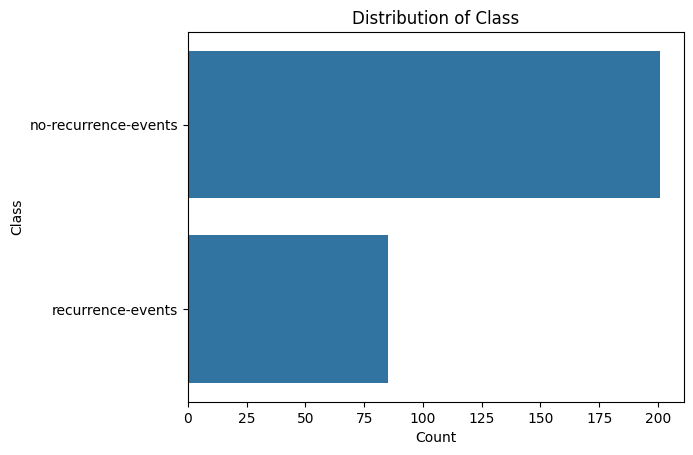

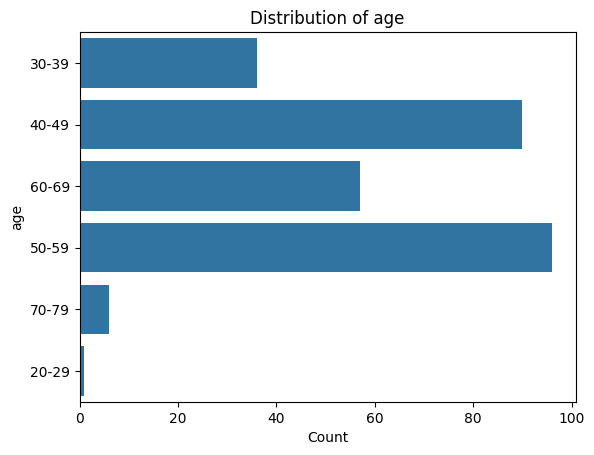

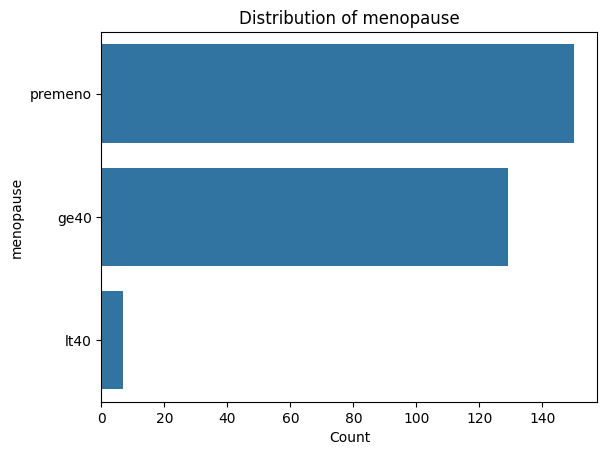

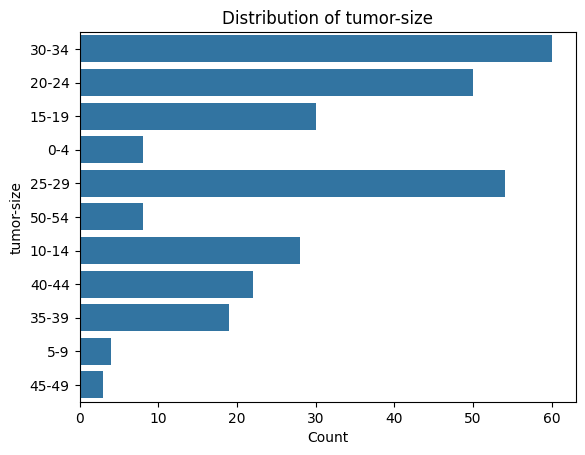

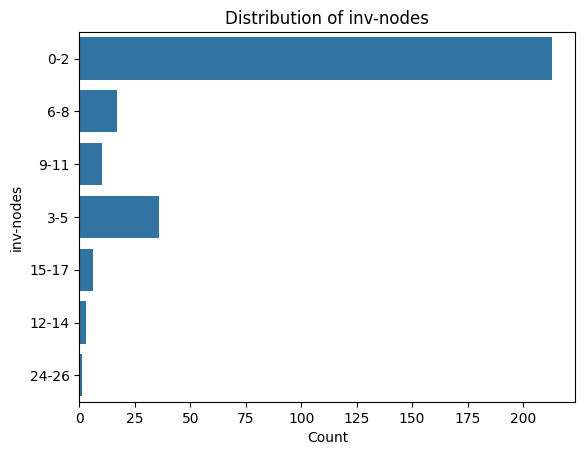

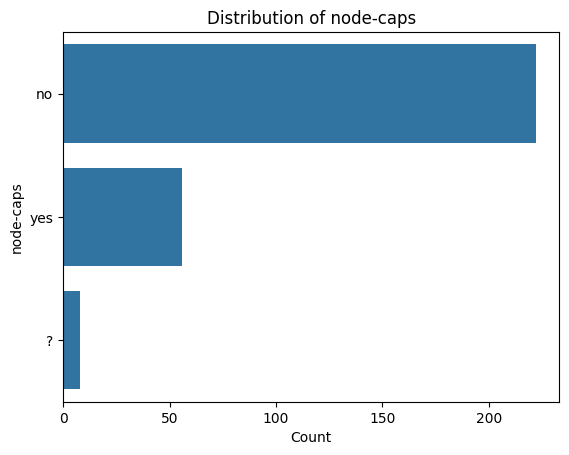

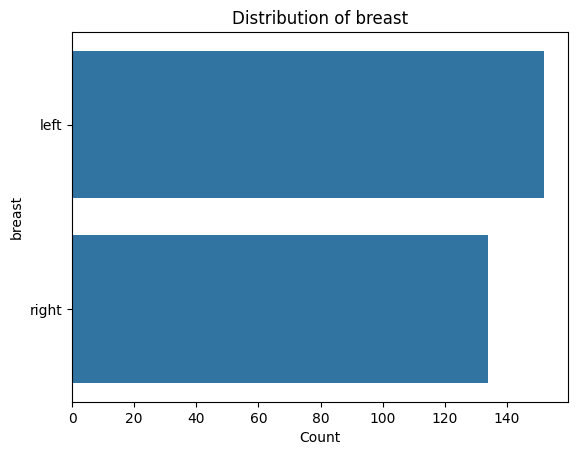

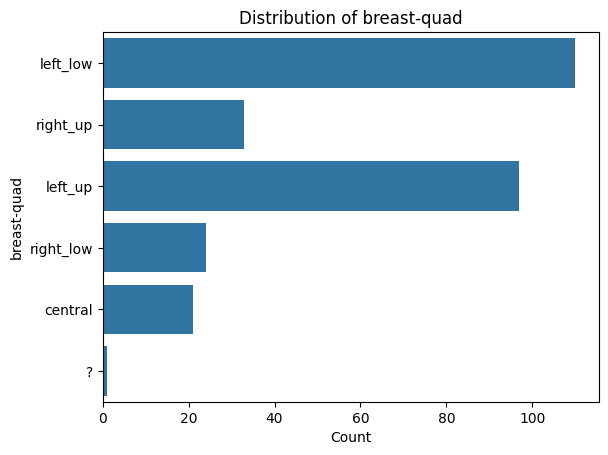

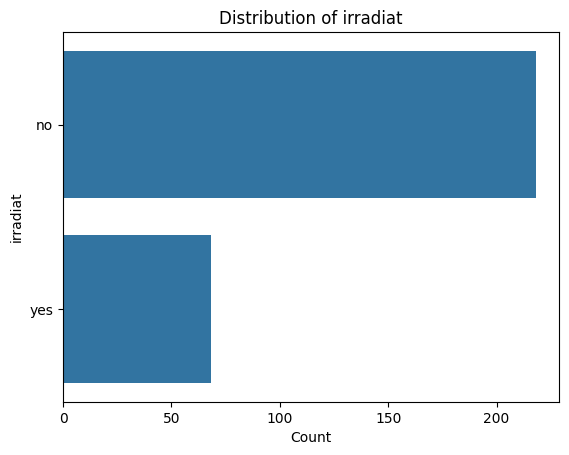

In [215]:
for feature in headers:
    if df[feature].dtype == object:
        sns.countplot(df[feature])
        plt.ylabel(feature)
        plt.xlabel("Count")
        plt.title(f"Distribution of {feature}")
        plt.show()

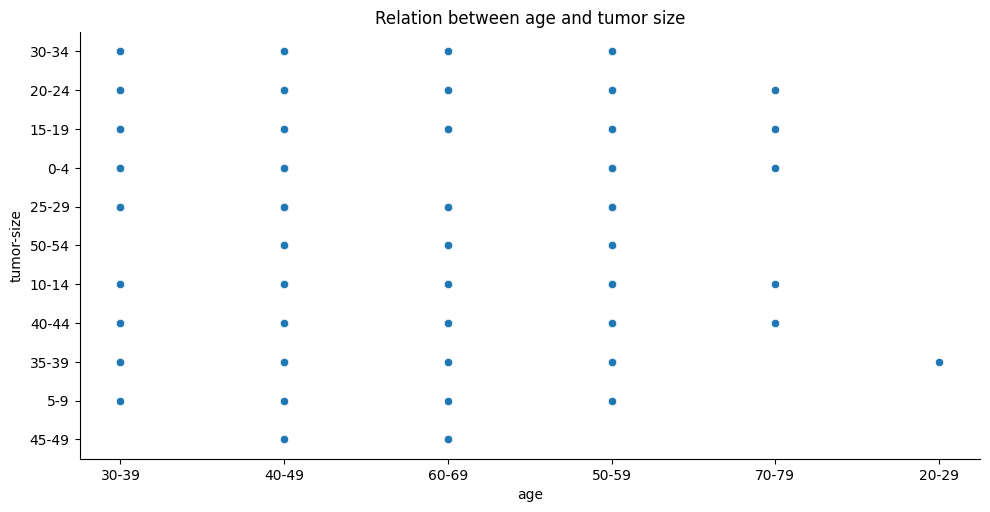

In [216]:
sns.relplot(data=df, x='age', y='tumor-size', aspect=2)
plt.title("Relation between age and tumor size")
plt.show()

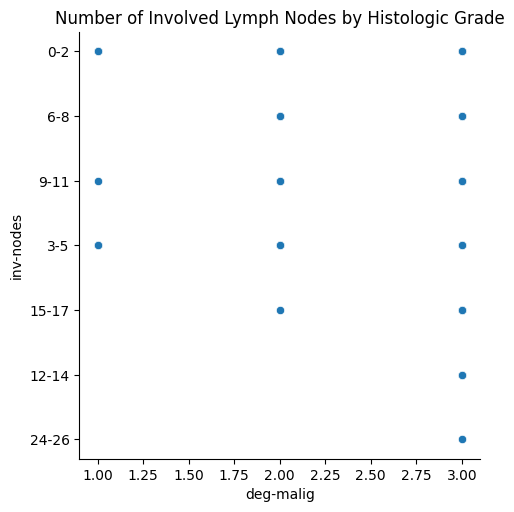

In [217]:
sns.relplot(data=df, x="deg-malig", y="inv-nodes")
plt.title("Number of Involved Lymph Nodes by Histologic Grade")
plt.show()

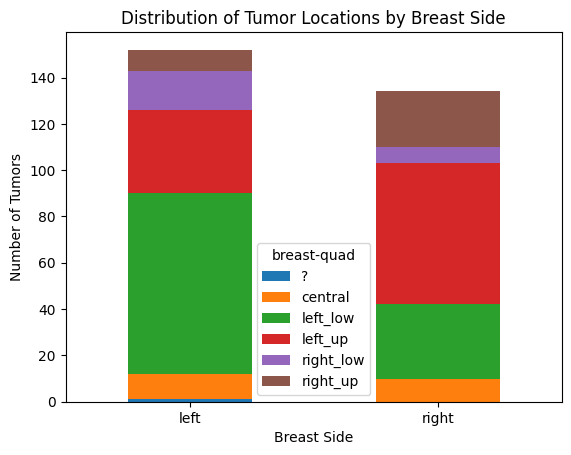

In [218]:
tumor_location_counts = df.groupby(['breast', 'breast-quad']).size().unstack()
tumor_location_counts.plot(kind="bar", stacked=True)
plt.title("Distribution of Tumor Locations by Breast Side")
plt.xlabel("Breast Side")
plt.ylabel("Number of Tumors")
plt.xticks(rotation=0)
plt.show()

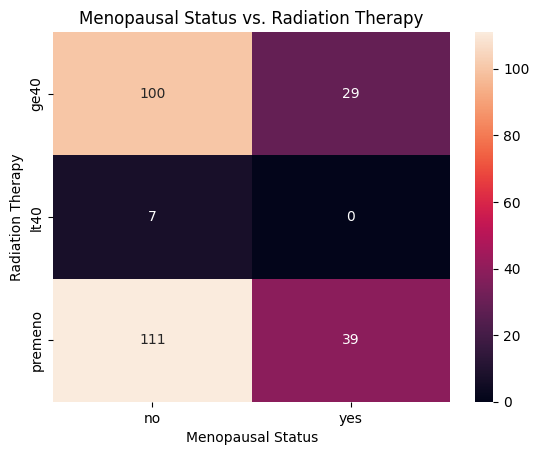

In [219]:
contingency_table = pd.crosstab(df["menopause"], df["irradiat"])
sns.heatmap(contingency_table, annot=True, fmt="d")
plt.title("Menopausal Status vs. Radiation Therapy")
plt.xlabel("Menopausal Status")
plt.ylabel("Radiation Therapy")
plt.show()

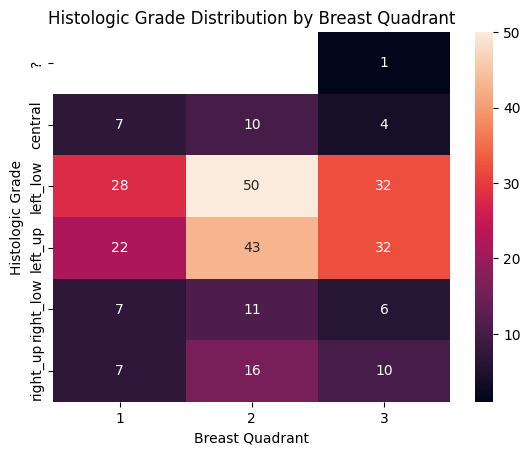

In [220]:
grade_quadrant_counts = df.groupby(['breast-quad', 'deg-malig']).size().unstack()
sns.heatmap(grade_quadrant_counts, annot=True)
plt.title("Histologic Grade Distribution by Breast Quadrant")
plt.xlabel("Breast Quadrant")
plt.ylabel("Histologic Grade")
plt.show()

### Data Preprocessing

In [221]:
import sklearn.preprocessing as scpp

#### Missing values

In [222]:
df.replace("?", pd.NA, inplace=True)
df = df.dropna()

#### Encoding Categorical features

In [223]:
le = scpp.LabelEncoder()

l = ['menopause', 'breast', 'breast-quad', 'age', 'tumor-size', 'inv-nodes', 'node-caps', 'irradiat', "Class"]
for i in l:
    df.loc[:, f'{i}_encoded'] = le.fit_transform(df[i])
df['menopause_encoded'] = le.fit_transform(df['menopause'])
df['breast_encoded'] = le.fit_transform(df['breast'])
df['breast-quad_encoded'] = le.fit_transform(df['breast-quad'])
df['age_encoded'] = le.fit_transform(df['age'])
df['tumor-size_encoded'] = le.fit_transform(df['tumor-size'])
df['inv-nodes_encoded'] = le.fit_transform(df['inv-nodes'])
df['node-caps_encoded'] = le.fit_transform(df['node-caps'])
df['irradiant'] = le.fit_transform(df['irradiat'])

df.drop(l, axis=1, inplace=True)

### Data Exploring again

In [224]:
print(f"How dataframe looks:\n {df.head()}")
print("\n", "_" * 32, "\n")
print(f"Shape of dataframe:\n {df.shape}")
print("\n", "_" * 32, "\n")
print(f"Count of values in dataframe:\n {df.value_counts()}")
print("\n", "_" * 32, "\n")
print(f"Information of dataframe:\n {df.info()}")
print("\n", "_" * 32, "\n")
print(f"Statistical description of dataframe:\n  {df.describe()}")

How dataframe looks:
    deg-malig  menopause_encoded  breast_encoded  breast-quad_encoded  \
0          3                  2               0                    1   
1          2                  2               1                    4   
2          2                  2               0                    1   
3          2                  0               1                    2   
4          2                  2               1                    3   

   age_encoded  tumor-size_encoded  inv-nodes_encoded  node-caps_encoded  \
0            1                   5                  0                  0   
1            2                   3                  0                  0   
2            2                   3                  0                  0   
3            4                   2                  0                  0   
4            2                   0                  0                  0   

   irradiat_encoded  Class_encoded  irradiant  
0                 0              0      

In [225]:
print(df.columns)

for col in df.columns:
    print("\n", "_" * 32, "\n")
    print(f"\nColumn Name: {col}\n")

    print(f"Data Type: {df[col].dtype}")

    missing_count = df[col].isnull().sum()
    print(f"Missing Values: {missing_count}")

    if df[col].dtype == object:
        unique_values = df[col].unique()
        print(f"Unique Values: {', '.join(unique_values)}")
        value_counts = df[col].value_counts()
        print(f"Value Counts:\n{value_counts}")

    elif df[col].dtype == int or df[col].dtype == float:
        print("Descriptive Statistics:")
        print(df[col].describe())

Index(['deg-malig', 'menopause_encoded', 'breast_encoded',
       'breast-quad_encoded', 'age_encoded', 'tumor-size_encoded',
       'inv-nodes_encoded', 'node-caps_encoded', 'irradiat_encoded',
       'Class_encoded', 'irradiant'],
      dtype='object')

 ________________________________ 


Column Name: deg-malig

Data Type: int64
Missing Values: 0
Descriptive Statistics:
count    277.000000
mean       2.057762
std        0.729989
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg-malig, dtype: float64

 ________________________________ 


Column Name: menopause_encoded

Data Type: int64
Missing Values: 0
Descriptive Statistics:
count    277.000000
mean       1.093863
std        0.988264
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: menopause_encoded, dtype: float64

 ________________________________ 


Column Name: breast_encoded

Data Type: int64
Missing Values: 0
D

### Data Features Engineering

## Model

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [227]:
X = df.drop("Class_encoded", axis=1)
y = df["Class_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model selection and evaluation

In [228]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6964
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        37
           1       0.60      0.32      0.41        19

    accuracy                           0.70        56
   macro avg       0.66      0.60      0.60        56
weighted avg       0.68      0.70      0.67        56



In [229]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6964
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        37
           1       0.62      0.26      0.37        19

    accuracy                           0.70        56
   macro avg       0.67      0.59      0.59        56
weighted avg       0.68      0.70      0.65        56



In [230]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6786
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        37
           1       0.53      0.47      0.50        19

    accuracy                           0.68        56
   macro avg       0.64      0.63      0.63        56
weighted avg       0.67      0.68      0.67        56



In [231]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6250
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        37
           1       0.43      0.32      0.36        19

    accuracy                           0.62        56
   macro avg       0.56      0.55      0.55        56
weighted avg       0.60      0.62      0.61        56



In [232]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7143
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        37
           1       0.67      0.32      0.43        19

    accuracy                           0.71        56
   macro avg       0.70      0.62      0.62        56
weighted avg       0.70      0.71      0.68        56



In [233]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6429
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        37
           1       0.47      0.47      0.47        19

    accuracy                           0.64        56
   macro avg       0.60      0.60      0.60        56
weighted avg       0.64      0.64      0.64        56



In [234]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Learning rate set to 0.005407
0:	learn: 0.6898933	total: 1.9ms	remaining: 1.9s
1:	learn: 0.6874875	total: 3.63ms	remaining: 1.81s
2:	learn: 0.6846760	total: 4.16ms	remaining: 1.38s
3:	learn: 0.6815607	total: 4.8ms	remaining: 1.19s
4:	learn: 0.6785637	total: 5.57ms	remaining: 1.11s
5:	learn: 0.6762642	total: 6.06ms	remaining: 1s
6:	learn: 0.6730001	total: 6.5ms	remaining: 921ms
7:	learn: 0.6699437	total: 7.11ms	remaining: 882ms
8:	learn: 0.6672888	total: 7.74ms	remaining: 853ms
9:	learn: 0.6651705	total: 8.03ms	remaining: 795ms
10:	learn: 0.6622269	total: 8.43ms	remaining: 758ms
11:	learn: 0.6592308	total: 8.96ms	remaining: 738ms
12:	learn: 0.6574542	total: 9.32ms	remaining: 708ms
13:	learn: 0.6547488	total: 9.66ms	remaining: 680ms
14:	learn: 0.6517495	total: 10.1ms	remaining: 665ms
15:	learn: 0.6489520	total: 10.6ms	remaining: 649ms
16:	learn: 0.6462775	total: 11ms	remaining: 639ms
17:	learn: 0.6439287	total: 11.6ms	remaining: 633ms
18:	learn: 0.6417501	total: 12.2ms	remaining: 631ms
1

In [235]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 62, number of negative: 159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 221, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280543 -> initscore=-0.941770
[LightGBM] [Info] Start training from score -0.941770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [289]:
import torch
from torch import nn
from sklearn.metrics import roc_auc_score

device = "cpu"


class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x


model = Model(input_dim=X_train.shape[1], hidden_dim=4, num_classes=1).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

X_tensor = torch.tensor(X_train.values, dtype=torch.float).to(device)
y_tensor = torch.tensor(y_train.values, dtype=torch.float).to(device)

for epoch in range(250):
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_tensor.unsqueeze(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).to(device)
with torch.no_grad():
    y_pred = model(X_test_tensor)

auc = roc_auc_score(y_test_tensor.cpu(), y_pred.cpu().detach().numpy())
print(f"AUC-ROC: {auc:.4f}")

AUC-ROC: 0.6124


### Model Fine Tuning

### Model interpreting

## Conclusion